In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [0]:
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file = '/content/drive/My Drive/master_dataset.csv'
contents = pd.read_csv(file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,9,10,11,12,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
contents[:3]

,survey_date,region,country,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,3/24/2020,NaN,CA,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050
1,3/25/2020,NaN,CA,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050
2,3/25/2020,NaN,CA,male,80_90,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701


In [0]:
y = contents['covid19_positive'].values

In [0]:
contents = contents.fillna(value=0)

In [0]:
ages = contents['age']

In [0]:
ages_two = [str(i).split('_') for i in list(ages.values)]

In [0]:
new_ages = []

for age_set in ages_two:
    if len(age_set) == 2:
        new_ages.append((int(age_set[0]) + int(age_set[1])) * 0.5)
    else:
        new_ages.append(None)
        
contents['age'] = new_ages

In [0]:
X = [list(risks) for risks in zip(contents['age'][:100000], contents['height'], contents['weight'], contents['bmi'], contents['house_count'], contents.iloc[:, 38], contents.iloc[:, 39], contents.iloc[:, 40], contents.iloc[:, 41], contents.iloc[:, 42], contents.iloc[:, 43], contents.iloc[:, 44], contents.iloc[:, 45], contents.iloc[:, 46], contents.iloc[:, 47], contents.iloc[:, 48], contents.iloc[:, 49], contents.iloc[:, 50], contents.iloc[:, 51], contents.iloc[:, 52])]
X = np.array(X)

In [0]:
big_lst = []
for row in X:
    lst = []
    for val in row:
        try:
            f = float(val)
            lst.append(f)
        except ValueError:
            lst.append(0)
    big_lst.append(lst)

In [0]:
X = np.array(big_lst)

In [0]:
X.shape

(100000, 20)

In [0]:
logisticregression = LogisticRegression(max_iter=2000)

In [0]:
logisticregression.fit(X = X[:100000], y = y[:100000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
probs = logisticregression.predict_proba(X[:10000])

In [0]:
prob_covid = probs[:, 1]

In [0]:
low_risk = plt.imread()

In [0]:
X.shape

(100000, 20)

(array([6.600e+01, 7.100e+01, 4.230e+02, 1.380e+03, 1.870e+03, 1.852e+03,
        1.298e+03, 7.710e+02, 5.560e+02, 3.680e+02, 2.700e+02, 1.650e+02,
        1.190e+02, 6.900e+01, 6.600e+01, 4.200e+01, 3.500e+01, 3.400e+01,
        3.100e+01, 2.200e+01, 2.500e+01, 2.300e+01, 9.000e+00, 1.600e+01,
        1.500e+01, 1.500e+01, 2.500e+01, 1.800e+01, 1.500e+01, 1.600e+01,
        1.000e+01, 1.700e+01, 8.000e+00, 9.000e+00, 1.000e+01, 4.000e+00,
        3.000e+00, 7.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 7.000e+00,
        3.000e+00, 7.000e+00, 3.000e+00, 7.000e+00, 0.000e+00, 1.000e+00,
        5.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

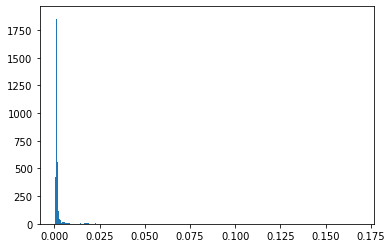

In [0]:
plt.hist(probs[:, 1], bins = 1000)

In [0]:
high_risk = plt.imread('/content/drive/My Drive/High Risk.jpg')
medium_risk = plt.imread('/content/drive/My Drive/Medium Risk.jpg')
low_risk = plt.imread('/content/drive/My Drive/Low Risk.jpg')

In [0]:
def find_rel_pos(prob):
  probab = 100 * (1 - (prob_covid < prob).sum() / len(prob_covid))
  print(f'According to our model, you are less likely to get COVID than {int(probab)} percent of people.')
  return probab

In [0]:
def model(params):
  prob = logisticregression.predict_proba([params])[0][1]
  print(prob)
  find_rel_pos(prob)

Infermedica API Information

Application ID: eff3bb9b Application keys: ee299652c71a7a7b4a18b3faac74045e

In [0]:
find_covid([19, 180, 70, 25, 6, 0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])

def model(symptoms, nursing_home, age_80_plus, covid_19_contact, male):
  return (2.718281828 ** (-7.05 + 2.8731 * symptoms + 2.9192 * nursing_home + 2.1929 * age_80_plus + 1.6362 * covid_19_contact + 0.5395 * male)) / (1 + 2.718281828 ** (-7.05 + 2.8731 * symptoms + 2.9192 * nursing_home + 2.1929 * age_80_plus + 1.6362 * covid_19_contact + 0.5395 * male))

0.005203174629827511
According to our model, you are less likely to get COVID than 3 percent of people.


In [0]:
import pickle as pkl
pkl.dump(logisticregression, open( "/content/drive/My Drive/logreg.pkl", "wb" ) )

In [0]:
def model(symptoms, nursing_home, age_80_plus, covid_19_contact, male):
  probability = (2.718281828 ** (-7.05 + 2.8731 * symptoms + 2.9192 * nursing_home + 2.1929 * age_80_plus + 1.6362 * covid_19_contact + 0.5395 * male)) / (1 + 2.718281828 ** (-7.05 + 2.8731 * symptoms + 2.9192 * nursing_home + 2.1929 * age_80_plus + 1.6362 * covid_19_contact + 0.5395 * male))
  plt.xticks([])
  plt.yticks([])
  if probability > 0.5:
    plt.imshow(high_risk)
  elif probability > 0.1:
    plt.imshow(medium_risk)
  else:
    plt.imshow(low_risk)
  return probability


0.9573401269004513

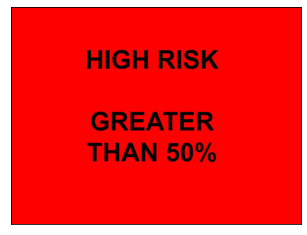

In [0]:
model(nursing_home=True, symptoms=True, age_80_plus=True, covid_19_contact=True, male=True)

0.11907698731689315

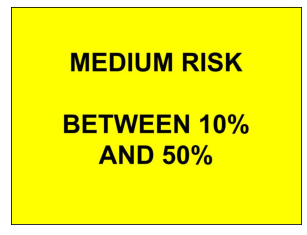

In [0]:
model(nursing_home=False, symptoms=True, age_80_plus=False, covid_19_contact=True, male=True)

0.0008666572121101084

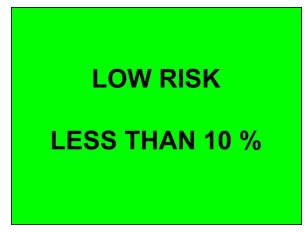

In [0]:
model(nursing_home=False, symptoms=False, age_80_plus=False, covid_19_contact=False, male=False)